# Week 2 Homework, Q. 3.3
### Jonathan P. Williams, _Introduction to the Interstellar Medium_

|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/9/2021|

## Question 3.
The specific intensity of a star is, to first order, a blackbody. For a given effective temperature, $T_\textrm{eff}$, and stellar radius, $R$, derive its bolometric luminosity. Look up values for these paramters and calculate this formula for the Sun. Plot the SED ($\nu F_\nu$ versus $\nu$) for $T_\textrm{eff}=10^3,\,5\times10^3,\,10^4\,\textrm{K}$

$$
L_\textrm{bol} = \frac{32\pi^2hR^2}{c^2}\int_0^\infty{\frac{\nu^3}{e^{h\nu/kT_\textrm{eff}}-1}d\nu}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

h = 6.63e-34 # [Js]
k = 1.38e-23 # [J/K]
c = 3e8      # [m/s]

B = lambda nu, T: 2*h*nu**3/c**2/(np.exp(h*nu/k/T)-1) # Planck function

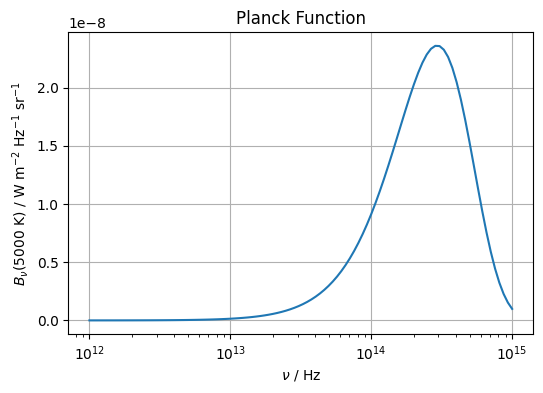

In [2]:
Teff = 5e3
nus = np.logspace(12, 15, 100)

fig, ax = plt.subplots(dpi=100)
ax.set(title='Planck Function',
       xlabel=r'$\nu$ / Hz',
       ylabel=r'$B_\nu$(5000 K) / W m$^{-2}$ Hz$^{-1}$ sr$^{-1}$')
ax.semilogx(nus, B(nus, Teff))
ax.grid()

In [3]:
R = 6.96e8   # Rsun [m]
Teff = 5770  # [K]
integral, err = integrate.quad(B, 0, 8e16, args=(Teff,))
prefac = 16*np.pi**2*R**2
Lsun = prefac*integral
print('Lsun = {:.2e} W'.format(Lsun))

Lsun = 1.52e+27 W


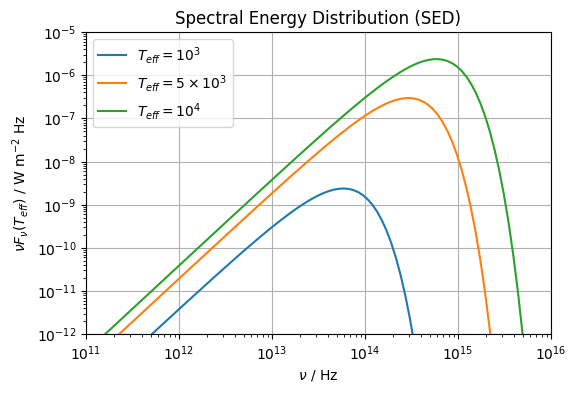

In [4]:
nus = np.logspace(11, 16, 100)

fig, ax = plt.subplots(dpi=100)
ax.set(title='Spectral Energy Distribution (SED)',
       xlabel=r'$\nu$ / Hz',
       ylabel=r'$\nu F_\nu(T_{eff})$ / W m$^{-2}$ Hz',
       xlim=(1e11, 1e16),
       ylim=(1e-12, 1e-5))
ax.loglog(nus, 4*np.pi*B(nus, 1e3), label=r'$T_{eff}=10^3$')
ax.loglog(nus, 4*np.pi*B(nus, 5e3), label=r'$T_{eff}=5\times10^3$')
ax.loglog(nus, 4*np.pi*B(nus, 1e4), label=r'$T_{eff}=10^4$')
ax.legend()
ax.grid()
plt.savefig('Q3.3_SED.pdf', bbox_inches='tight')